### Notebook to train and visualize results from training
- Set global training configuration for 
- Call train_models script (should parameters be here or in train models?) 
- The trained parameters should be held to have option to save them to saved_models, or?
- Plot results from training

In [1]:
import matplotlib as plt 
import torch 
import neuralg
import os
# Append main folder, is this needed?
#import sys
#sys.path.append("..")

11:15:33|neuralg-INFO| Initialized neuralg for cpu


##### Load default configurations

In [2]:
cfg = neuralg.load_default_cfg()


#### Print default configurations

In [3]:
print(cfg)

DotMap(use_gpu=False, seed=100, model_type='nerf', n_neurons=200, hidden_layers=8, matrix_sizes=[3, 4, 5], batch_parameters=DotMap(N=10, d=5, operation='eig', dist='gaussian', interval=10), run_params=DotMap(iterations=2000, epoch=1, lr=0.0003, loss_fcn='eigval_L1', mixed_eigval_distributions=False), test_cfg=DotMap(N=10000, wigner=True, distributions=['gaussian', 'uniform', 'laplace'], interval=10, tolerances=[0.1, 0.05, 0.025, 0.02, 0.01, 0.005]))


#### Set matrix parameters, here are some example choices

In [4]:
# E.g. If we want to train models for sizes 4x4 & 5x5. 
## This will govern number of models trained in a run
cfg.matrix_sizes = [3,4]
#Set batch size 
cfg.batch_parameters.N = 64 
# We can also characterize the batch eigenvalue distribution 
cfg.batch_parameters.dist = "laplace" 


#### Set training run parameters

In [5]:
cfg.run_params.iterations = 100
cfg.run_params.epochs = 2

#### Run training with the set configurations

In [6]:
run_cfg = neuralg.train_models(cfg,save_training_run= False)


11:15:33|neuralg-DEBUG| Setting LogLevel to TRACE
11:15:33|neuralg-TRACE| Calling training for matrix size 3
11:15:33|neuralg-TRACE| Initializing training...
11:15:33|neuralg-TRACE| Starting training...
11:15:34|neuralg-TRACE| Reloading best model state...
11:15:34|neuralg-TRACE| Calling training for matrix size 4
11:15:34|neuralg-TRACE| Initializing training...
11:15:34|neuralg-TRACE| Starting training...
11:15:35|neuralg-TRACE| Reloading best model state...
11:15:35|neuralg-TRACE| Finalized training all requested models...


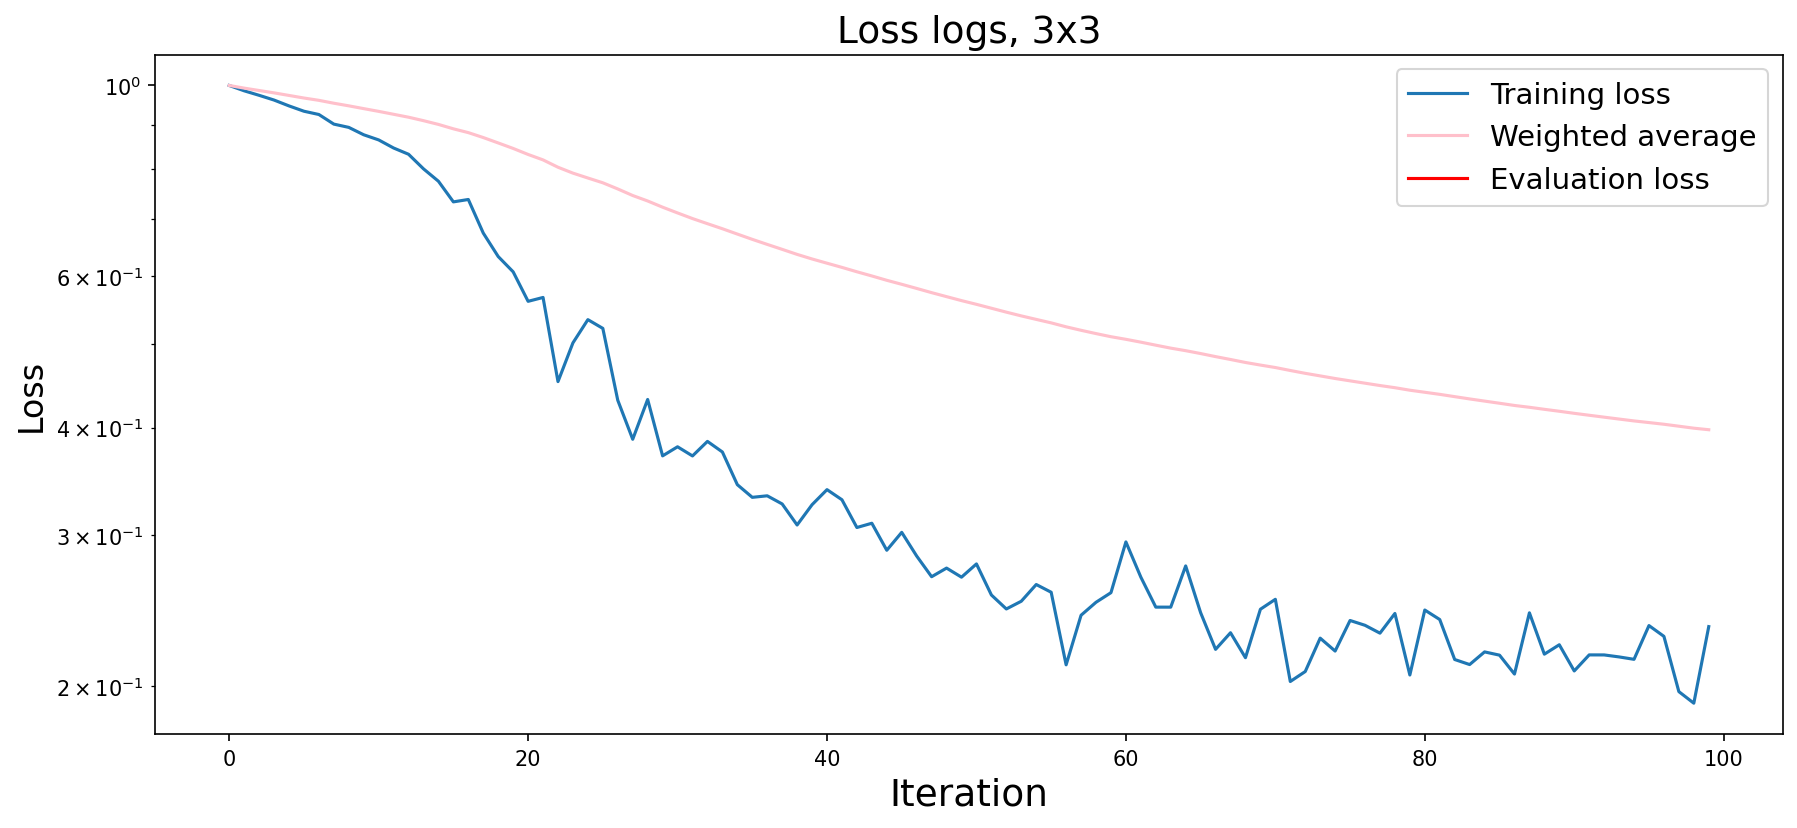

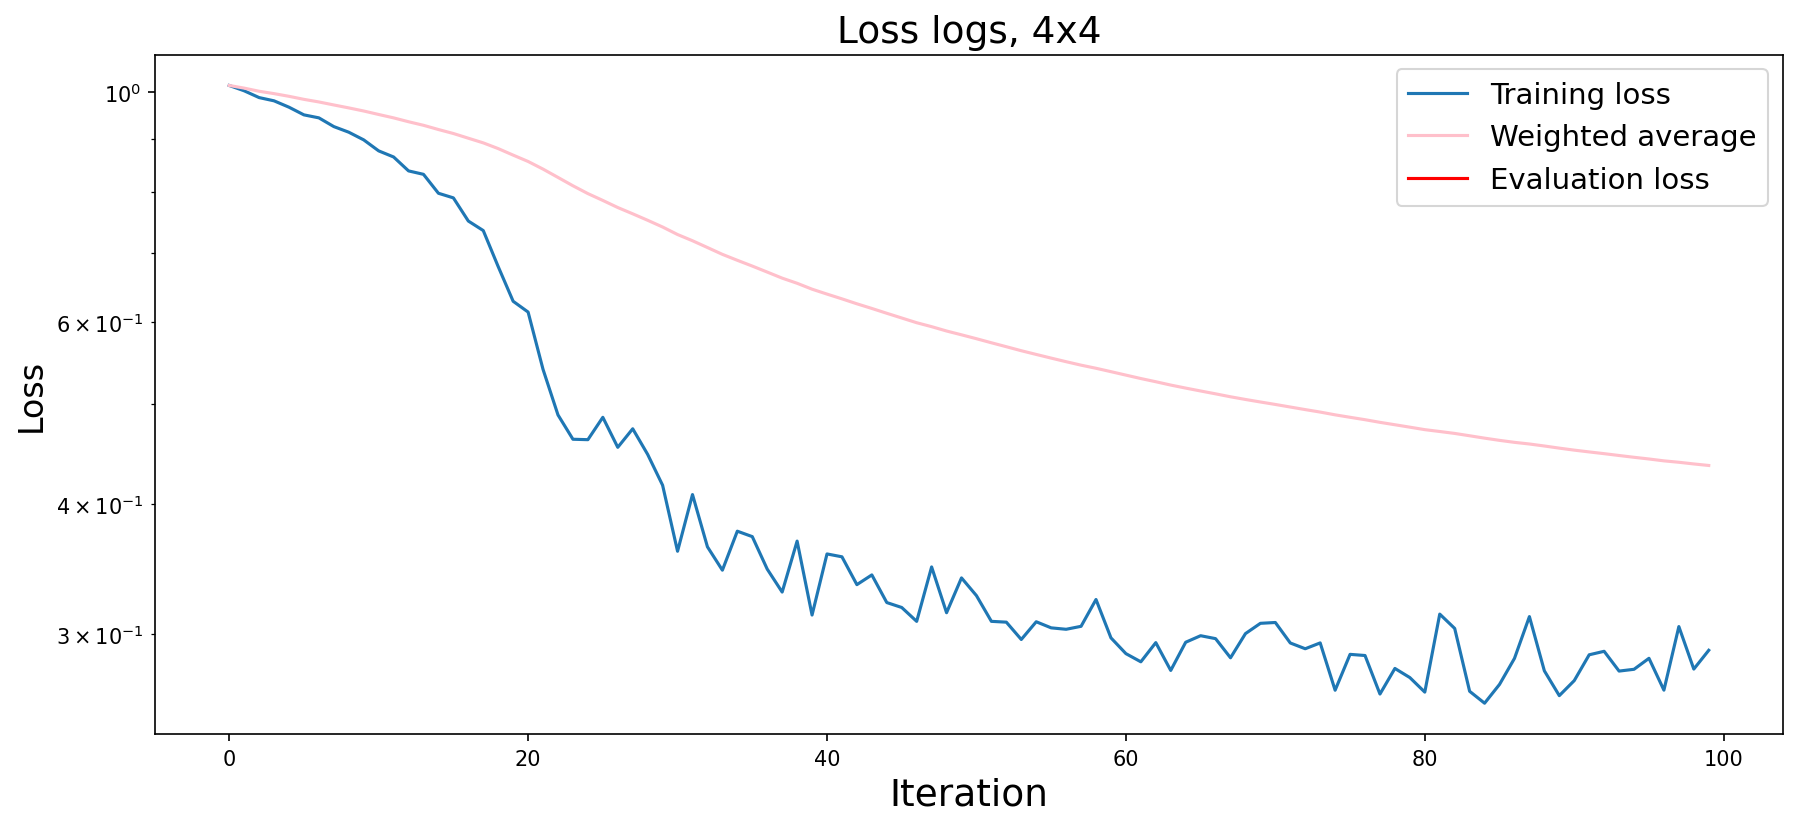

In [7]:
neuralg.plot_loss_logs(run_cfg, save_path = os.pardir)
#print(run_cfg["4"].results.eval_loss_log)

#### Evaluate model

In [9]:
evaluated_run_cfg = neuralg.evaluate(run_cfg)
print(run_cfg["3"].test_results["0"][0])

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

#### Optionally save run, if not called in training run

In [ ]:
neuralg.save_run(run_cfg)